# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.298783e+01     1.508689e+01
 * time: 0.004074811935424805
     1     6.240734e+01     1.078667e+01
 * time: 0.13793396949768066
     2     5.519786e+01     1.394857e+01
 * time: 0.15616488456726074
     3     4.128829e+01     1.013302e+01
 * time: 0.18232297897338867
     4     3.244127e+01     8.797612e+00
 * time: 0.20786595344543457
     5     1.371708e+01     2.897668e+00
 * time: 0.23316383361816406
     6     1.013530e+01     3.093259e+00
 * time: 0.2511098384857178
     7     9.009389e+00     2.505264e+00
 * time: 0.26934289932250977
     8     8.372206e+00     2.884040e+00
 * time: 0.287585973739624
     9     7.841080e+00     1.455443e+00
 * time: 0.30658888816833496
    10     7.705973e+00     2.679081e+00
 * time: 0.32305192947387695
    11     7.379894e+00     2.653542e+00
 * time: 0.33885979652404785
    12     6.975274e+00     1.928884e+00
 * time: 0.4246368408203125
    13     6.694145e+00     1.207476e+00
 * time: 0.

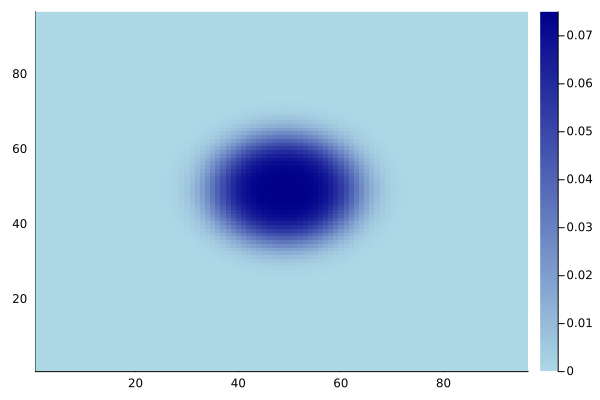

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)